# Import Modules
You may need to install some of them.

In [1]:
using Revise, DeconvOptim, TestImages, Images, FFTW, Noise, ImageView

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    colorview(Gray, img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

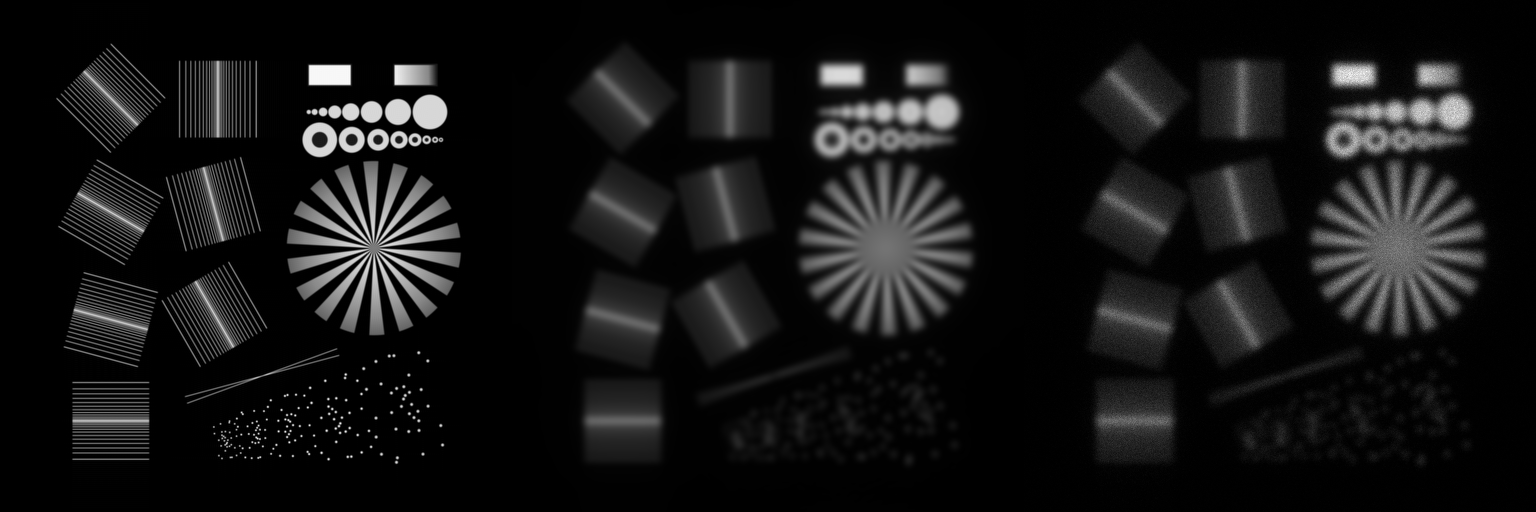

In [4]:
# load test images
img = 300 .* convert(Array{Float32}, channelview(testimage("resolution_test_512")))

psf = generate_psf(size(img), 30)

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2])
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Changing the loss function

  3.466073 seconds (25.22 M allocations: 2.849 GiB, 14.12% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.092351e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 8.66e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.27e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.72e+02 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.26e-05 ≰ 0.0e+00
    |g(x)|                 = 5.00e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   3  (vs limit Inf)
    Iterations:    10
    f(x) calls:    31
    ∇f(x) calls:   31

  4.333015 seconds (33.08 M allocations: 3.966 GiB, 5.73% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     6.333398e+06

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.23e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.08e-01 ≰ 0.0e+00


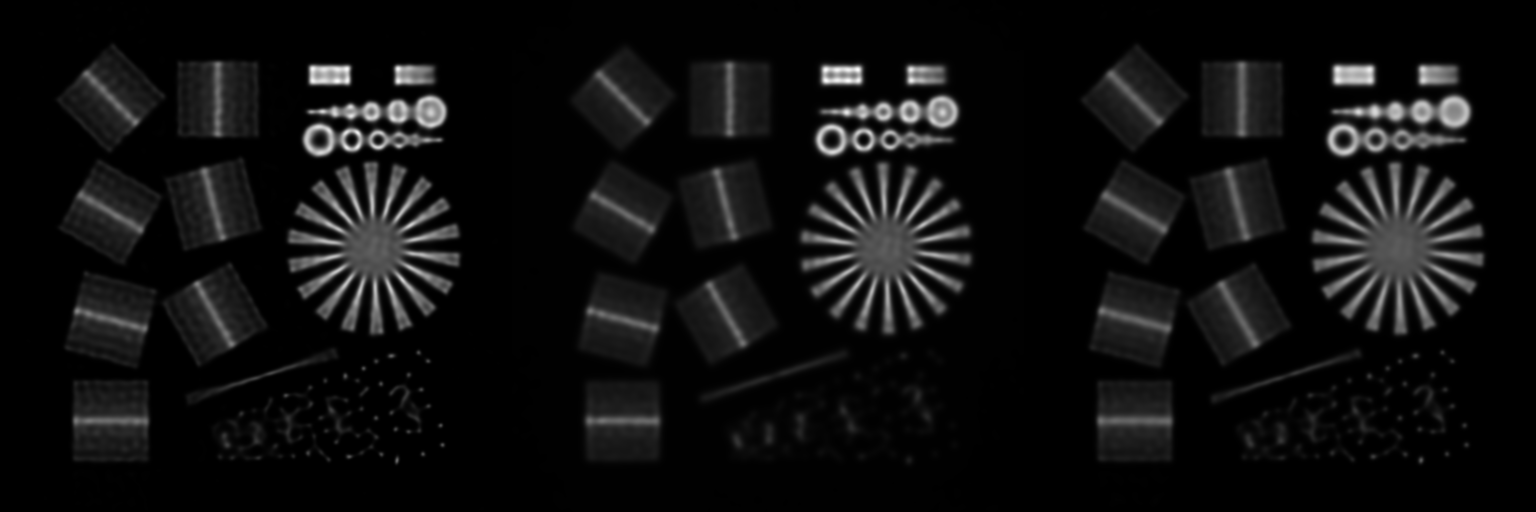

In [6]:
@time resP, optim_res = deconvolution(img_n, psf, loss=Poisson(), iterations=10)
@show optim_res

@time resG, optim_res = deconvolution(img_n, psf, loss=Gauss(), iterations=10)
@show optim_res

@time resSG, optim_res = deconvolution(img_n, psf, loss=ScaledGauss(), iterations=10)
@show optim_res

h_view(resP, resG, resSG)